![Sheffield Logo](img/TUOS_PRIMARY_LOGO_FULL_COLOUR_75.png)

# Making The Most Out Of Jupyter Notebooks

### Using Extentions And Libraries

2020-10-06

John Charlton, Research Software Engineer, RSE Team 

(pronoun: he)

# Notebooks are good
- Great for quickly prototyping
- Easy to explore data
- The format lends itself to educating

# Notebooks are bad
- Not great for large, extended pieces of code
- Good coding practices can be hard to apply

- Can lessen the downsides & strengthen the upsides with extensions

# Version Control 

`!pip install jupytext --upgrade`

`.ipynb` file format uses `Json` underneath

Able to save as `.md`, `.rmd`, `.html` and more

Edit file in favourite IDE, refresh page and see results

Sensible version control
    e.g. diff, merge
    
Also load plain text files into notebooks


# Pytests
`!pip install nbval`

Ensure that the notebook is behaving as expected and changes to the underlying source code have not affected the results

Runs the notebook, and compares the output with those stored in the .ipynb file.

Can validate this file!
`pytest --nbval *.ipynb

# Slideshows
The power of notebooks with the display capabilities of slides.
Choose what to show and hide from the notebooks.

`View->Cell Toolbar->Slideshow` to bring up slide control options

## Jupyter Notebook's buit-in slides
`jupyter nbconvert *.ipynb --to slides --post serve`

Run from commandline within folder. `nbconvert` transforms notebooks into a static format
- Generate static html pages locally at port 8000
- Geneates a .html file within the directory


## Rise
`pip install rise`
- Run code without exiting the slideshow
- Uses reveal.js, a javascript presentation framework
- Powering this presentation

In [6]:
# background code for the widget slide
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

x1 = np.linspace(0, 2*np.pi, 100)

def wave_generator(freq, amplitude, graph_type, reverse):
    if graph_type == "sin":
        y = amplitude * np.sin(x1 * freq)
    elif graph_type == "cos":
        y = amplitude * np.cos(x1 * freq)
    elif graph_type == "tan":
        y = amplitude * np.tan(x1 * freq)
    else:
        y = x1
    if reverse:
        y = -y
    return y

def plot_func(freq, amplitude, graph_type, reverse):
    y = wave_generator(freq, amplitude, graph_type, reverse)
    [l.remove() for l in ax1.lines]
    ax1.plot(x1, y, color='C0')


# Widgets
`!pip install ipywidgets`

Powerful way to interact with code

Sliders, tickboxes, textboxes, colour pickers, tabs...


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_ylim([-3, 3])
ax1.grid(True)
ax1.set_title("Trig Wave");

<IPython.core.display.Javascript object>

In [13]:
widgets.interact(plot_func, freq = (1,5,0.5), amplitude = (1,5,0.5), graph_type = ['sin', 'cos', 'tan'], reverse=False);

interactive(children=(FloatSlider(value=3.0, description='freq', max=5.0, min=1.0, step=0.5), FloatSlider(valu…

# Widgets Continued: Play Widget

<IPython.core.display.Javascript object>


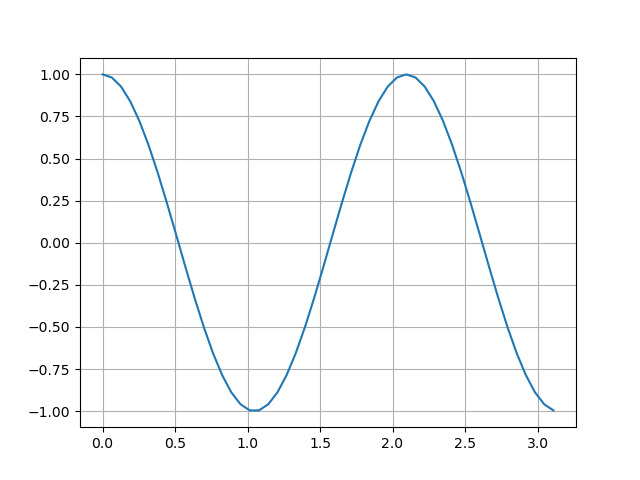

In [30]:
fig2, ax2 = plt.subplots()
# ax2.set_ylim([-3, 3])
ax2.grid(True)

x2 = np.linspace(0, 2*np.pi, 100)
y2 = np.cos(3*x2)

def f(i):
    [l.remove() for l in ax2.lines]
    ax2.plot(x2[:i], y2[:i], color='C0')


In [32]:
widgets.interactive(f, i=widgets.Play(value=0, min=0, max=50, step=1, interval=50))


interactive(children=(Play(value=0, description='i', interval=50, max=50), Output()), _dom_classes=('widget-in…

In [25]:
# backend for following qgrid example
import pandas as pd
from datetime import time

# some columns should be datetime format
parse_dates = ['date']

df = pd.read_csv("df_example.csv", parse_dates=parse_dates)

df['dwell'] = pd.to_timedelta(df['dwell'])

def handle_filter_changed(event, widget):
    qgrid_df = qgrid_widget.get_changed_df()
    x3 = qgrid_df['dwell']/pd.Timedelta(seconds=1)
    ax3.clear()
    ax3.set_xlabel("dwell (s)")
    ax3.set_title("train dwell at platform")
    n, bins, patches = ax3.hist(x3, 50, density=True)
    fig3.canvas.draw()

# Qgrid
`pip install qgrid`

Powerful way to explore DataFrames

scrolling, sorting, filtering

nb: using "Split Cells Notebook" extention to display 2 cells horizontally

In [26]:
import qgrid

qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Qgrid 

<IPython.core.display.Javascript object>


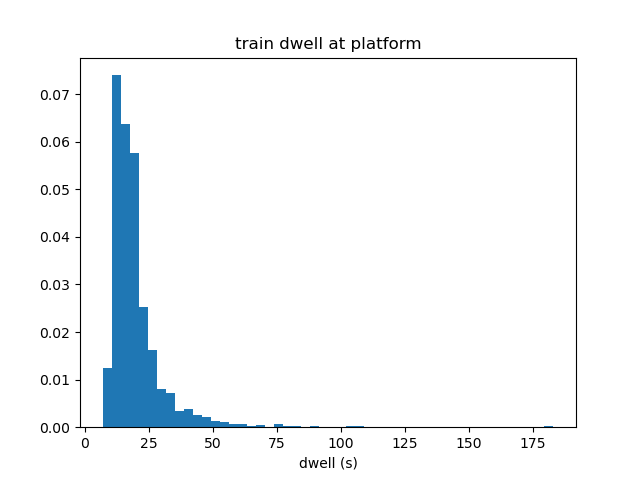

In [29]:
fig3, ax3 = plt.subplots()
handle_filter_changed(0,0)

qgrid_widget.on('filter_changed', handle_filter_changed)

In [28]:
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Conclusions
Thank you for listening